# Stereo Camera Calculations

$$
z = \frac{f B}{d} \\
z = \frac{f}{px_{size}} \frac{B}{d} = \frac {meter}{meter/pixel} \frac {meter}{pixel} = meter
$$

where z is the depth, B is the baseline, f is the focal length, 
$px_{size}$ is the pixel size, and d is the disparity.

> WARNING: OpenCV reports focal length in pixels, so the above equation
is modified by not dividing by pixel size ($px_{size}$)

Camera depth error ($\partial z$) given a pixel error ($\partial d$):

$$
\frac{\partial z}{\partial d} = -\frac{f B}{d^2} \leftarrow d = \frac{f B}{z} \\
\partial z = -\frac{z^2}{f B} \partial d
$$

## References

- [Pi Camera](https://www.raspberrypi.com/documentation/accessories/camera.html)
- [Stereo camera calculator](https://nerian.com/support/calculator/#results)
- [error modelling](https://www.flir.com/support-center/iis/machine-vision/application-note/stereo-accuracy-and-error-modeling/)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [97]:
pixel_size = 1.12e-6 # um
focal_len = 3.04e-3 # mm
fov_h = 62.2 # deg
fov_v = 48.8 # deg
sensor_w_px = 3280
sensor_h_px = 2464
f_stop = 2
f_num = f_stop

In [98]:
# get from diagonal size of sensor
c = np.sqrt(3280**2 + 2464**2)
sensor_diag_size = 4.6 # mm
sensor_w_mm = sensor_w_px*sensor_diag_size/c
sensor_h_mm = sensor_h_px*sensor_diag_size/c
print(f"Sensor Size [mm], width: {sensor_w_mm:.2f} height: {sensor_h_mm:.2f}") # correct!

Sensor Size [mm], width: 3.68 height: 2.76


In [102]:
w = pixel_size * sensor_w_px * 1000 # mm
h = pixel_size * sensor_h_px * 1000 # mm
print(f"Sensor Size [mm], width: {w:.2f} height: {h:.2f}") # correct!

Sensor Size [mm], width: 3.67 height: 2.76


In [89]:
# https://nerian.com/support/calculator/#results
u = 2 # focus distance
circ = 1.5 * pixel_size # circle of confusion
depthOfField = (2*(u**2)*f_num*circ)/focal_len
print("DoF:", depthOfField)

DoF: 0.008842105263157894


In [103]:
print("Focal length [px]", focal_len / pixel_size)

Focal length [px] 2714.285714285714


Max distance [m]
30mm: 16.3
45mm: 24.4
60mm: 32.6
65mm: 35.3
70mm: 38.0
75mm: 40.7


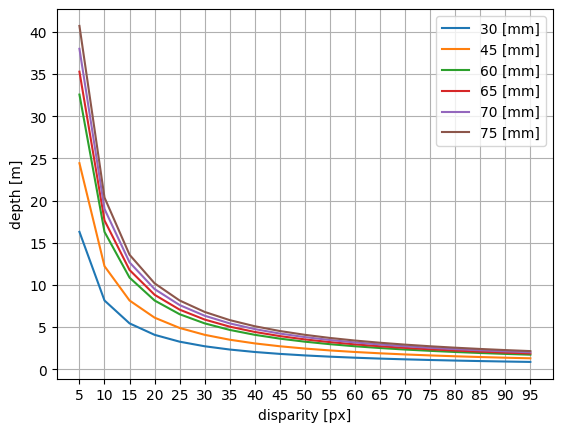

In [107]:
disparity = np.arange(5,100,5) # px
# baseline = np.xrange(20,80)*1e-3 # mm
baselines = [30,45,60,65,70,75]
depth = []

print("Max distance [m]")
for baseline in baselines:
    z = focal_len / pixel_size * (baseline * 1e-3) / disparity
    depth.append(z)
    
    min_px = 5 # minimum pixels
    print(f"{baseline}mm: {focal_len / pixel_size * (baseline * 1e-3) / min_px:.1f}")
depth = np.array(depth)

for i, d in enumerate(depth):
    plt.plot(d,label=str(baselines[i]) + " [mm]")
    plt.legend()
    xt = list(range(len(disparity)))
    plt.xticks(xt,disparity)
    plt.xlabel("disparity [px]")
    plt.ylabel("depth [m]")
    plt.grid(True);

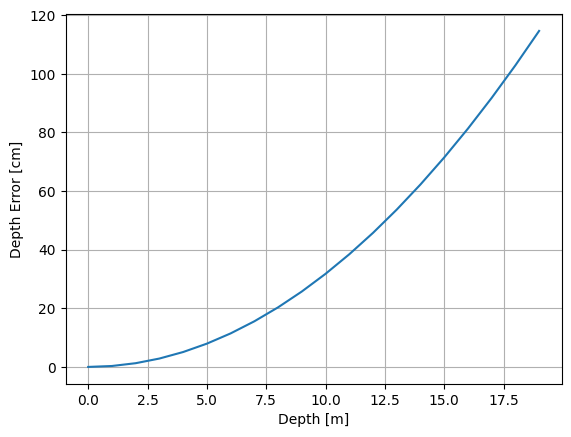

In [93]:
# https://robotics.stackexchange.com/questions/11749/estimate-disparity-error-for-depth-accuracy-estimation
# https://nerian.com/support/calculator/#results
depth_poi = np.arange(20)
disparity_err = 0.25 # px, this seems really small, OpenCV SGBM can be 1 px
# baseline = np.arange(20,100) * 1e-3 # mm
baseline = 29e-3
depth_error = depth_poi**2 /(baseline * focal_len / pixel_size) * disparity_err

plt.plot(depth_poi, 100*depth_error); # works
plt.xlabel("Depth [m]")
plt.ylabel("Depth Error [cm]")
plt.grid(True);